In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv("D:/NCI Assignments/DMML-2/DMML Data/ner_dataset.csv", encoding= 'unicode_escape')
data

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
...,...,...,...,...
1048359,NaN,NaN,NaN,NaN
1048360,NaN,NaN,NaN,NaN
1048361,NaN,NaN,NaN,NaN
1048362,NaN,NaN,NaN,NaN


In [3]:
# Fill missing values using the 'ffill' method
data.fillna(method = 'ffill', inplace = True)

# Print the resulting data frame
print(data)


              Sentence #           Word  POS Tag
0            Sentence: 1      Thousands  NNS   O
1            Sentence: 1             of   IN   O
2            Sentence: 1  demonstrators  NNS   O
3            Sentence: 1           have  VBP   O
4            Sentence: 1        marched  VBN   O
...                  ...            ...  ...  ..
1048359  Sentence: 46090              .    .   O
1048360  Sentence: 46090              .    .   O
1048361  Sentence: 46090              .    .   O
1048362  Sentence: 46090              .    .   O
1048363  Sentence: 46090              .    .   O

[1048364 rows x 4 columns]


In [4]:
# The path to the NER corpus
ner_corpus_path = "D:/NCI Assignments/DMML-2/DMML Data/ner.csv"

# Read the NER corpus into a Pandas data frame
new_data = pd.read_csv(ner_corpus_path, encoding="utf-8")

# Print the first five rows of the data frame
print(new_data.head())


    Sentence #                                           Sentence  \
0  Sentence: 1  Thousands of demonstrators have marched throug...   
1  Sentence: 2  Families of soldiers killed in the conflict jo...   
2  Sentence: 3  They marched from the Houses of Parliament to ...   
3  Sentence: 4  Police put the number of marchers at 10,000 wh...   
4  Sentence: 5  The protest comes on the eve of the annual con...   

                                                 POS  \
0  ['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...   
1  ['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...   
2  ['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...   
3  ['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...   
4  ['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...   

                                                 Tag  
0  ['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '...  
1  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...  
2  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...  
3  ['O', 'O', 'O', 'O', 'O',

In [5]:
def joining_the_sentence(sentence_number):
    sentence_number = str(sentence_number)

    # Get the words in the sentence
    sentence_words = data.loc[data["Sentence #"] == f"Sentence: {sentence_number}", "Word"].tolist()

    # Join the words into a sentence
    joined_sentence = " ".join(sentence_words)

    return joined_sentence

In [6]:
def joining_the_sentence(sentence_number):
    sentence_number = str(sentence_number)

    # Get the words in the sentence
    sentence_words = data.loc[data["Sentence #"] == f"Sentence: {sentence_number}", "Word"].tolist()

    # Join the words into a sentence
    joined_sentence = " ".join(sentence_words)

    return joined_sentence

print(joining_the_sentence(sentence_number=10))

Iranian officials say they expect to get access to sealed sensitive parts of the plant Wednesday , after an IAEA surveillance system begins functioning .


In [7]:
data.describe()

,Sentence #,Word,POS,Tag
count,1048364,1048364,1048364,1048364
unique,46090,34538,42,17
top,Sentence: 46090,.,NN,O
freq,40441,86330,140160,894054


In [8]:
data.shape

(1048364, 4)

In [9]:
# Find the number of unique sentence numbers
number_of_unique_sentence_numbers = len(np.unique(data["Sentence #"]))

print(number_of_unique_sentence_numbers)

46090


In [10]:
# Find the number of unique words and tags
number_of_unique_words = data["Word"].nunique()
number_of_unique_tags = data["Tag"].nunique()

# Print the results
print("No. of unique words:", number_of_unique_words)
print("No. of unique tags:", number_of_unique_tags)


No. of unique words: 34538
No. of unique tags: 17


In [11]:
# Get the unique tags
unique_tags = data["Tag"].unique()

# Print the unique tags
print(unique_tags)


['O' 'B-geo' 'B-gpe' 'B-per' 'I-geo' 'B-org' 'I-org' 'B-tim' 'B-art'
 'I-art' 'I-per' 'I-gpe' 'I-tim' 'B-nat' 'B-eve' 'I-eve' 'I-nat']


In [12]:
import pandas as pd

def total_words_tags(unique_tags, data):
    tags_count = {}

    for tag in unique_tags:
        # Get the number of words with the tag
        len_tag = data.loc[data["Tag"] == tag, :].shape[0]

        # Add the number of words to the tags_count dictionary
        tags_count[tag] = len_tag

    return tags_count

In [13]:
tags_count = total_words_tags(unique_tags, data)
print(tags_count)

{'O': 894054, 'B-geo': 36180, 'B-gpe': 15228, 'B-per': 16323, 'I-geo': 7136, 'B-org': 19306, 'I-org': 16119, 'B-tim': 19518, 'B-art': 383, 'I-art': 284, 'I-per': 16587, 'I-gpe': 188, 'I-tim': 6276, 'B-nat': 196, 'B-eve': 296, 'I-eve': 241, 'I-nat': 49}


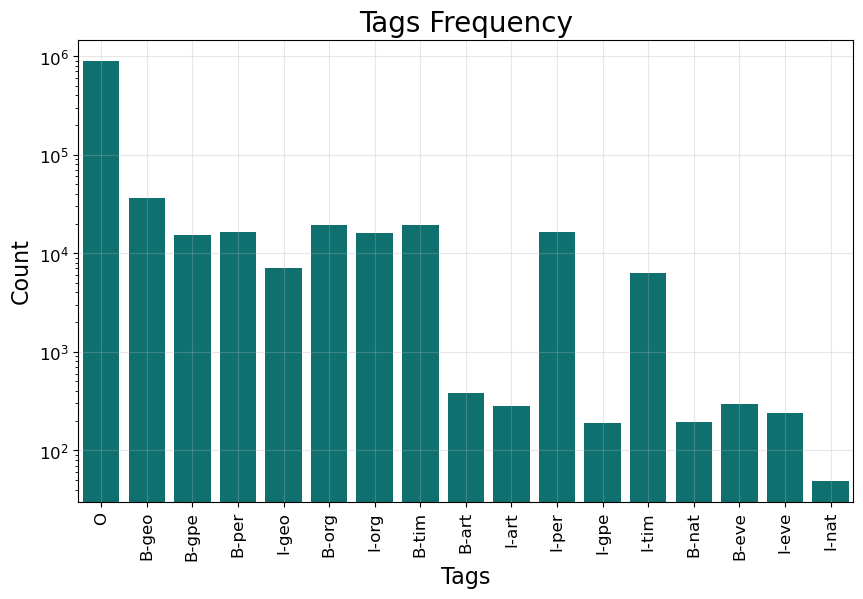

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Tag', log=True, color='teal')
plt.xlabel('Tags', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title("Tags Frequency", fontsize=20)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

# Data Preprocessing

In [15]:
new_data

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
...,...,...,...,...
47954,Sentence: 47955,Indian border security forces are accusing the...,"['JJ', 'NN', 'NN', 'NNS', 'VBP', 'VBG', 'PRP$'...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe..."
47955,Sentence: 47956,Indian officials said no one was injured in Sa...,"['JJ', 'NNS', 'VBD', 'DT', 'NN', 'VBD', 'VBN',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
47956,Sentence: 47957,Two more landed in fields belonging to a nearb...,"['CD', 'JJR', 'VBD', 'IN', 'NNS', 'VBG', 'TO',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"['PRP', 'VBP', 'RB', 'DT', 'IN', 'DT', 'NNS', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [16]:
# Get the sentences and tags as lists
X = new_data["Sentence"].tolist()
Y = new_data["Tag"].tolist()

print(X)
print(Y)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
from ast import literal_eval
Y_ready = [literal_eval(sen_tags) for sen_tags in Y]
print("First two Tags: \n")
print(Y_ready[:3])

print("First two sentences: \n")
print(X[:3])

First two Tags: 

[['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O']]
First two sentences: 

['Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .', 'Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . "', 'They marched from the Houses of Parliament to a rally in Hyde Park .']


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Get the number of examples
number_of_examples = len(X)

# Print the number of examples
print("No. of examples:", number_of_examples)


No. of examples: 47959


In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum number of words per sentence and the maximum number of words in the dataset
maxlen = 110
max_words = 36000

# Create a tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")

# Fit the tokenizer on the sentences
tokenizer.fit_on_texts(X)

# Convert the sentences to sequences
word_index = tokenizer.word_index
sequences = []
for sentence in X:
    sequence = []
    for word in sentence.split():
        if word in word_index:
            sequence.append(word_index[word])
        else:
            sequence.append(word_index["<UNK>"])
    sequences.append(sequence)

# Pad the sequences to the maximum length
sequences = pad_sequences(sequences, maxlen=maxlen)

In [20]:
# Get the vocabulary size
num_unique_tokens = len(tokenizer.word_index)

# Print the number of unique tokens
print(f"Found {num_unique_tokens} unique tokens.")

# Create a dictionary that maps indices to words
ind2word = {value: key for key, value in tokenizer.word_index.items()}

# Create a dictionary that maps words to indices
word2id = tokenizer.word_index


Found 27954 unique tokens.


In [21]:
# Create a dictionary that maps indices to words
id2word = dict(zip(word2id.values(), word2id.keys()))

In [22]:
# Pad the sequences to the maximum length
X_preprocessed = pad_sequences(sequences, maxlen=maxlen, padding='post')

# Print the first preprocessed sentence
print(X_preprocessed[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1    4  998   14 1839  246    1    5  546    2  122    3
    1    7  596    2  862    4    1   90   22   13   55    1]


In [23]:
X_preprocessed[20000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1, 1454, 1860,  335,    3, 7423, 1700,    1])

In [24]:
# Create a dictionary that maps tags to indices
tags2id = {}
for i, tag in enumerate(unique_tags):
    tags2id[tag] = i

# Print the tags2id dictionary
print(tags2id)

{'O': 0, 'B-geo': 1, 'B-gpe': 2, 'B-per': 3, 'I-geo': 4, 'B-org': 5, 'I-org': 6, 'B-tim': 7, 'B-art': 8, 'I-art': 9, 'I-per': 10, 'I-gpe': 11, 'I-tim': 12, 'B-nat': 13, 'B-eve': 14, 'I-eve': 15, 'I-nat': 16}


In [25]:
# Create a dictionary that maps tags to indices
tags2id = dict(zip(unique_tags, np.arange(len(unique_tags))))

# Create a dictionary that maps indices to tags
id2tag = dict((value, key) for key, value in tags2id.items())

# Print the id2tag dictionary
print(id2tag)


{0: 'O', 1: 'B-geo', 2: 'B-gpe', 3: 'B-per', 4: 'I-geo', 5: 'B-org', 6: 'I-org', 7: 'B-tim', 8: 'B-art', 9: 'I-art', 10: 'I-per', 11: 'I-gpe', 12: 'I-tim', 13: 'B-nat', 14: 'B-eve', 15: 'I-eve', 16: 'I-nat'}


In [26]:
def preprocess_tags(tags2id, Y_ready):
    Y_preprocessed = [
        [tags2id[tag] for tag in y]
        + [tags2id['O']] * (maxlen - len(y))
        for y in Y_ready
    ]
    return Y_preprocessed

Y_preprocessed = preprocess_tags(tags2id, Y_ready)
print(Y_preprocessed[0])

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [27]:
print(Y_ready[0])

['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


In [28]:
X_preprocessed = np.asarray(X_preprocessed)
Y_preprocessed = np.asarray(Y_preprocessed)

In [29]:
training_samples = 0.8
validation_samples = 0.10
testing_samples = 0.10

In [30]:
indices = np.arange(len(Y_preprocessed))
np.random.seed(seed=200)
np.random.shuffle(indices)
X_preprocessed = X_preprocessed[indices]
Y_preprocessed = Y_preprocessed[indices]

In [31]:
train_size = int(0.8 * len(X_preprocessed))
val_size = int(0.10 * len(X_preprocessed)) + 1

X_train = X_preprocessed[:train_size]
X_val = X_preprocessed[train_size:train_size + val_size]
X_test = X_preprocessed[train_size + val_size:]

print("Number of training examples: {}".format(len(X_train)))
print("Number of validation examples: {}".format(len(X_val)))
print("Number of testing examples: {}".format(len(X_test)))

Y_train = Y_preprocessed[:train_size]
Y_val = Y_preprocessed[train_size:train_size + val_size]
Y_test = Y_preprocessed[train_size + val_size:]

total_examples = len(X_train) + len(X_val) + len(X_test)
print("Total number of examples after shuffling and splitting: {}".format(total_examples))


Number of training examples: 38367
Number of validation examples: 4796
Number of testing examples: 4796
Total number of examples after shuffling and splitting: 47959


In [32]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

In [33]:
import tensorflow as tf

BATCH_SIZE = 150
SHUFFLE_BUFFER_SIZE = 150

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
val_dataset = val_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [34]:
embedding_dim = 350
maxlen = 110
max_words = 36000
num_tags = len(unique_tags)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_tags, activation='softmax'))
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 110, 350)          12600000  
                                                                 
 bidirectional (Bidirection  (None, 110, 200)          360800    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 110, 200)          240800    
 onal)                                                           
                                                                 
 time_distributed (TimeDist  (None, 110, 17)           3417      
 ributed)                                                        
                                                                 
Total params: 13205017 (50.37 MB)
Trainable params: 13205017 (50.37 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [35]:
import tensorflow as tf

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.metrics.sparse_categorical_accuracy])

In [36]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    verbose=1)


Epoch 1/10
256/256 [==============================] - 539s 2s/step - loss: 0.2156 - sparse_categorical_accuracy: 0.9658 - val_loss: 0.1584 - val_sparse_categorical_accuracy: 0.9694
Epoch 2/10
256/256 [==============================] - 553s 2s/step - loss: 0.1571 - sparse_categorical_accuracy: 0.9695 - val_loss: 0.1583 - val_sparse_categorical_accuracy: 0.9694
Epoch 3/10
256/256 [==============================] - 574s 2s/step - loss: 0.1567 - sparse_categorical_accuracy: 0.9695 - val_loss: 0.1576 - val_sparse_categorical_accuracy: 0.9694
Epoch 4/10
256/256 [==============================] - 588s 2s/step - loss: 0.1566 - sparse_categorical_accuracy: 0.9695 - val_loss: 0.1576 - val_sparse_categorical_accuracy: 0.9694
Epoch 5/10
256/256 [==============================] - 573s 2s/step - loss: 0.1564 - sparse_categorical_accuracy: 0.9695 - val_loss: 0.1574 - val_sparse_categorical_accuracy: 0.9694
Epoch 6/10
256/256 [==============================] - 583s 2s/step - loss: 0.1564 - sparse_cate

In [37]:
import tensorflow as tf

test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test loss: {:.4f}".format(test_loss))
print("Test accuracy: {:.4f}".format(test_accuracy))


32/32 [==============================] - 9s 295ms/step - loss: 0.1561 - sparse_categorical_accuracy: 0.9697
Test loss: 0.1561
Test accuracy: 0.9697


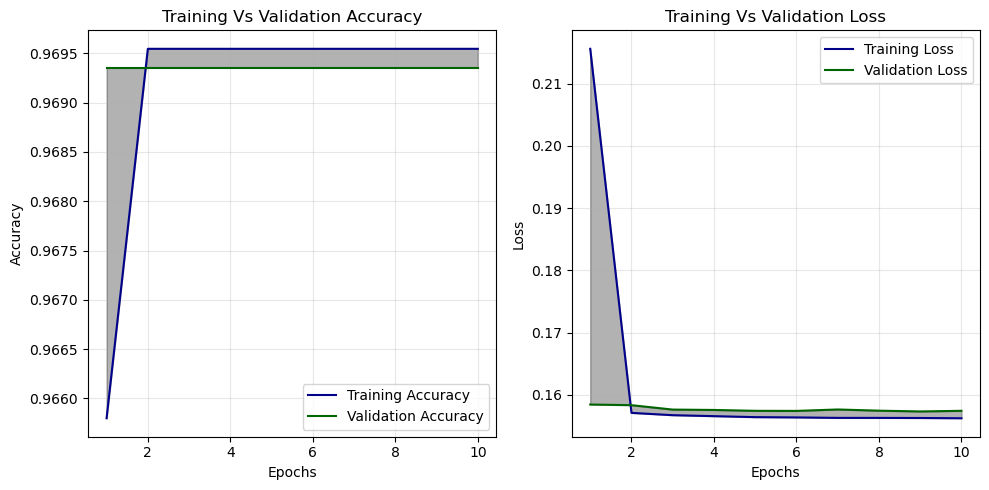

In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['sparse_categorical_accuracy']
    val_acc = history.history['val_sparse_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy', color='darkblue')
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='darkgreen')
    plt.grid(alpha=0.3)
    plt.title('Training Vs Validation Accuracy')
    plt.fill_between(epochs, acc, val_acc, color='black', alpha=0.3)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss', color='darkblue')
    plt.plot(epochs, val_loss, label='Validation Loss', color='darkgreen')
    plt.grid(alpha=0.3)
    plt.title('Training Vs Validation Loss')
    plt.fill_between(epochs, loss, val_loss, color='black', alpha=0.3)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [51]:
def make_prediction(model, preprocessed_sentence, id2word, id2tag):
    preprocessed_sentence = preprocessed_sentence.reshape((1, 110))
    
    sentence = preprocessed_sentence[preprocessed_sentence > 0]
    word_list = [id2word[word] for word in list(sentence)]
    original_sentence = ' '.join(word_list)
    
    len_original_sentence = len(word_list)
    
    prediction = model.predict(preprocessed_sentence)
    prediction = np.argmax(prediction[0], axis=1)
    
    prediction = list(prediction)[:len_original_sentence]
    
    pred_tag_list = [id2tag[tag_id] for tag_id in prediction]
    
    return original_sentence, pred_tag_list


In [52]:
orginal_sententce,  pred_tag_list = make_prediction(model=model,
                                                    preprocessed_sentence=X_test[520],
                                                    id2word=id2word,
                                                    id2tag=id2tag)

1/1 [==============================] - 0s 38ms/step


In [53]:
print(orginal_sententce)

<UNK> deployed soldiers there to stop insurgents from fleeing into <UNK> after a major <UNK> offensive against the <UNK> in <UNK> 's southern <UNK> province <UNK> which borders <UNK> <UNK>
